In [121]:
import pandas as pd

from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import seaborn as sb
import numpy as np

In [103]:
sensor_data = pd.read_csv("sensor_data.csv")
sensor_data.head()

,Freq [GHz],S12 Mag,S13 Mag,S14 Mag,S23 Mag,S24 Mag,S34 Mag,S12 Phase,S13 Phase,S14 Phase,...,S11 Mag,S22 Mag,S33 Mag,S44 Mag,S11 Phase,S22 Phase,S33 Phase,S44 Phase,Unnamed: 21,Size
0,0.5000,-37.187724,-31.418885,-34.128856,-29.037817,-33.332027,-40.789799,164.926277,149.138013,-143.880974,...,-0.331620,-0.204848,-0.397357,-0.219184,-13.935012,-23.023129,-21.882408,-17.095157,NaN,20
1,0.5058,-36.529669,-31.647838,-32.657613,-32.239524,-34.754974,-41.211043,156.204499,146.762764,-145.747771,...,-0.263459,-0.195931,-0.454456,-0.201555,-14.192140,-23.267137,-22.690164,-17.715602,NaN,20
2,0.5116,-35.776202,-31.917526,-31.326502,-34.768130,-36.353212,-42.016227,145.866520,144.636798,-149.366067,...,-0.224686,-0.184203,-0.533002,-0.191447,-14.698938,-23.579309,-23.310765,-18.269225,NaN,20
3,0.5174,-34.788751,-31.919946,-29.916169,-36.361959,-37.893149,-43.354957,136.036378,142.489474,-154.253116,...,-0.193858,-0.179147,-0.634686,-0.190974,-15.257679,-23.900862,-23.773387,-18.986116,NaN,20
4,0.5232,-33.955711,-31.922941,-28.488877,-37.732709,-39.603751,-45.046499,125.617079,139.395481,-161.396789,...,-0.188661,-0.178598,-0.805936,-0.194009,-15.601821,-24.109574,-23.818354,-19.463586,NaN,20


In [104]:
def clean_data(sensor_data):
    sensor_data = sensor_data.drop(columns=['Unnamed: 21'])
    return sensor_data

sensor_data_clean = clean_data(sensor_data.copy())
sensor_data_clean.head()

,Freq [GHz],S12 Mag,S13 Mag,S14 Mag,S23 Mag,S24 Mag,S34 Mag,S12 Phase,S13 Phase,S14 Phase,...,S34 Phase,S11 Mag,S22 Mag,S33 Mag,S44 Mag,S11 Phase,S22 Phase,S33 Phase,S44 Phase,Size
0,0.5000,-37.187724,-31.418885,-34.128856,-29.037817,-33.332027,-40.789799,164.926277,149.138013,-143.880974,...,-61.553371,-0.331620,-0.204848,-0.397357,-0.219184,-13.935012,-23.023129,-21.882408,-17.095157,20
1,0.5058,-36.529669,-31.647838,-32.657613,-32.239524,-34.754974,-41.211043,156.204499,146.762764,-145.747771,...,-62.741733,-0.263459,-0.195931,-0.454456,-0.201555,-14.192140,-23.267137,-22.690164,-17.715602,20
2,0.5116,-35.776202,-31.917526,-31.326502,-34.768130,-36.353212,-42.016227,145.866520,144.636798,-149.366067,...,-70.396311,-0.224686,-0.184203,-0.533002,-0.191447,-14.698938,-23.579309,-23.310765,-18.269225,20
3,0.5174,-34.788751,-31.919946,-29.916169,-36.361959,-37.893149,-43.354957,136.036378,142.489474,-154.253116,...,-72.342614,-0.193858,-0.179147,-0.634686,-0.190974,-15.257679,-23.900862,-23.773387,-18.986116,20
4,0.5232,-33.955711,-31.922941,-28.488877,-37.732709,-39.603751,-45.046499,125.617079,139.395481,-161.396789,...,-71.797398,-0.188661,-0.178598,-0.805936,-0.194009,-15.601821,-24.109574,-23.818354,-19.463586,20


In [114]:
X, y = sensor_data_clean.drop(columns=['Size']), sensor_data_clean['Size']
y = (y - 10) / 10

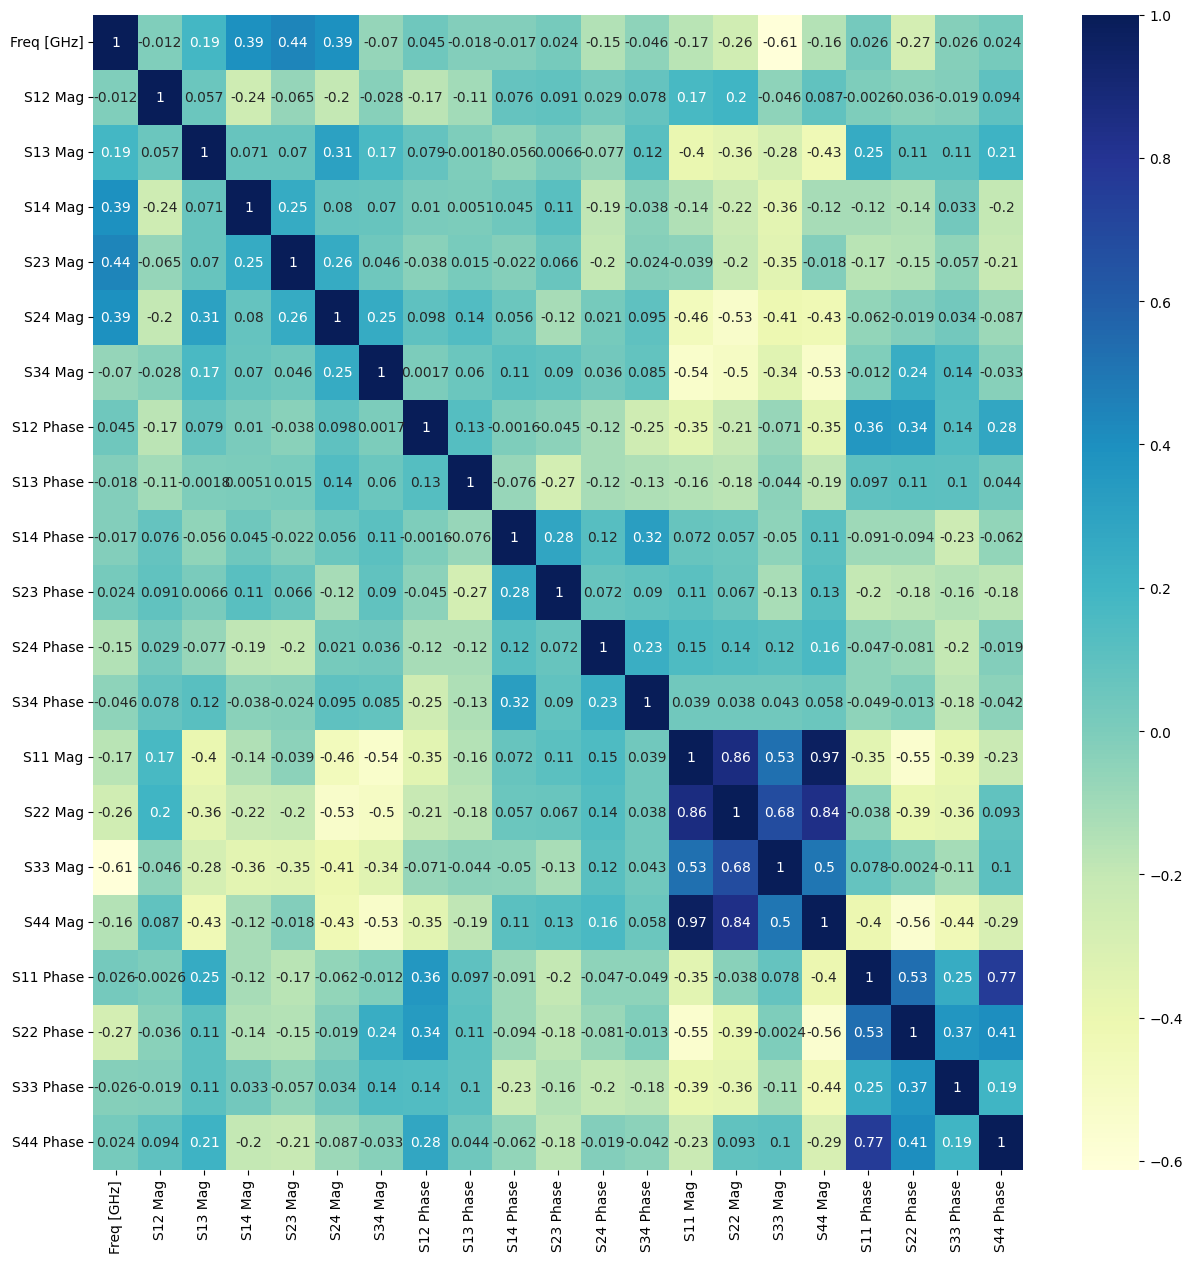

In [115]:
%matplotlib inline
corr = X.corr(numeric_only=True)
dataplot = sb.heatmap(corr, cmap="YlGnBu", annot=True)
dataplot.get_figure().set_size_inches(15, 15)

We may want to remove S22 and S44 as they are strongly coorelated with S11 but I will choose to keep them.

In [116]:
scaling=StandardScaler()

scaling.fit(X, y)

X = normalize(scaling.transform(X))

principal=PCA(n_components=3, random_state=42)
X_REDUCED = principal.fit_transform(X)
principal.explained_variance_ratio_.cumsum()

array([0.17125707, 0.31238999, 0.41578961])

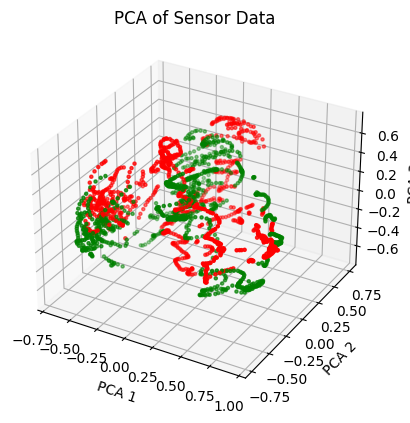

In [117]:
%matplotlib inline

color_based_on_y = ['red' if label == 1 else 'green' if label == -1 else 'blue' for label in y]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_REDUCED[:, 0], X_REDUCED[:, 1], X_REDUCED[:, 2], c=color_based_on_y, s=5)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('PCA of Sensor Data')
plt.show()

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# rng = np.random.default_rng(42)
n_iter = 20

param_dist = {
    'hidden_layer_sizes': [(i, j) for i in range(0, 1001, 50) for j in range(0, 1001, 50)],
    # 'activation': ['tanh', 'relu'],
    # 'alpha': np.logspace(-5, -1, 10),
    'random_state': [42],
    'solver': ["sgd"],
    'max_iter': [1000],
    'early_stopping': [True],
}

random_search = RandomizedSearchCV(MLPClassifier(), random_state=42, param_distributions=param_dist, n_iter=n_iter, cv=n_iter, scoring=('accuracy', 'f1'), refit='accuracy', verbose=2, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 20 folds for each of 20 candidates, totalling 400 fits


c:\Users\moham\Desktop\cie-417\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
140 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\moham\Desktop\cie-417\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\moham\Desktop\cie-417\.venv\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\moham\Desktop\cie-417\.venv\Lib\site-packages\sklearn\neural_net

Best Parameters: {'solver': 'sgd', 'random_state': 42, 'max_iter': 1000, 'hidden_layer_sizes': (500, 900), 'early_stopping': True}
Best Score: 0.9658469945355188


In [173]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [178]:
ll = [(rng.integers(0, 100), rng.integers(0, 100)) for _ in range(n_iter)]

def objective(trial):
    # hidden_layer_sizes = trial.suggest_categorical("hidden_layer_sizes", [(50,), (100,), (50, 50), (100, 50)])
    activation = trial.suggest_categorical("activation", ["relu", "tanh"])
    solver = trial.suggest_categorical("solver", ["sgd"])
    alpha = trial.suggest_float("alpha", 1e-5, 1e-1, log=True)
    
    pipeline = Pipeline([
        ("mlp", MLPClassifier(
            hidden_layer_sizes=ll[trial.suggest_categorical("hidden_layer_sizes", range(len(ll)))],
            activation=activation,
            solver=solver,
            alpha=alpha,
            max_iter=1000,
            random_state=42
        ))
    ], memory='cache')
    
    score = cross_val_score(pipeline, X, y, cv=3, scoring="accuracy", n_jobs=-1).mean()
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, n_jobs=-1)

print("Best Parameters:", study.best_params)
print("Best Score:", study.best_value)

Best Parameters: {'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0004524069759205472, 'hidden_layer_sizes': 25}
Best Score: 0.9225828702415259


In [201]:
# Binary Cross-Entropy Loss, learning_rate_init=1e-3
NN = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=1000, random_state=42, solver="sgd", verbose=True, early_stopping=True)
NN.fit(X_train, y_train)

Y_PRED = NN.predict(X_test)
Y_PRED = [1 if y > 0 else -1 for y in Y_PRED]

print("Accuracy: ", accuracy_score(y_test, Y_PRED))
print("f1_score: ", f1_score(y_test, Y_PRED))

Iteration 1, loss = 0.88000124
Validation score: 0.504132
Iteration 2, loss = 0.87555881
Validation score: 0.504132
Iteration 3, loss = 0.86898614
Validation score: 0.504132
Iteration 4, loss = 0.86165245
Validation score: 0.504132
Iteration 5, loss = 0.85376291
Validation score: 0.504132
Iteration 6, loss = 0.84632324
Validation score: 0.504132
Iteration 7, loss = 0.83866043
Validation score: 0.504132
Iteration 8, loss = 0.83174880
Validation score: 0.504132
Iteration 9, loss = 0.82466794
Validation score: 0.504132
Iteration 10, loss = 0.81830472
Validation score: 0.504132
Iteration 11, loss = 0.81203580
Validation score: 0.504132
Iteration 12, loss = 0.80606736
Validation score: 0.504132
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy:  0.49313358302122345
f1_score:  0.0


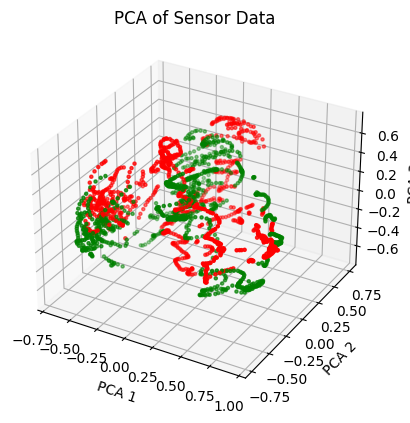

In [80]:
Y_PRED = NN.predict(X)
Y_PRED = [1 if y > 0 else -1 for y in Y_PRED]
color_based_on_y = ['red' if label == 1 else 'green' if label == -1 else 'blue' for label in Y_PRED]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_REDUCED[:, 0], X_REDUCED[:, 1], X_REDUCED[:, 2], c=color_based_on_y, s=5)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('PCA of Sensor Data')
plt.show()